<a href="https://colab.research.google.com/github/antoniomlo/Data_Science/blob/main/Analisando_Dados_da_Empresa_Supermercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Brand logo" width="10%" src="https://github.com/PAlab0/PAlab0/blob/main/logo.png?raw=true">


*by [Antonio Melo](https://www.linkedin.com/in/antoniomlo/)*

---

# Analisando Dados da Empresa - Supermercado

Para melhorar o desempenho operacional em todos os canais, a análise de dados de varejo pode ajudar varejistas e fornecedores a monitorar a demanda no nível da loja em tempo real, assim, você garante que os itens mais vendidos permaneçam em estoque. 

Para esse projeto, irei utilizar Python, mais especificamente a biblioteca Pandas, para obter todos os dados necessários para fazer uma Análise Exploratória.

<center><img width="90%" src="https://github.com/antoniomlo/Data_Science/blob/main/img/An%C3%A1lise%20de%20dados%20da%20Empresa%20-%20Mercado.png?raw=true
"></center>

Neste notebook, irei analisar os dados referentes à empresas de supermercados, e ver quais insights podem ser extraídos a partir de dados brutos.


# Extração dos dados

Para iniciar esse projeto, irei começar importando as bibliotecas que usarei e definindo algumas variáveis de cor como padrão.

In [68]:
# importar os pacotes necessários
import pandas as pd 
import matplotlib.pyplot as plt

# definir cores como padrão
p ='#FA6559'
cor1 = ['#e8e4f3','#e8e4f3','#e8e4f3','#e8e4f3','#e8e4f3', p]
cor = [p, '#e8e4f3','#e8e4f3','#e8e4f3','#e8e4f3','#e8e4f3']

In [69]:
# importar planilha do github
df = pd.read_csv('https://github.com/antoniomlo/Arquivos-Nuvem/raw/main/supermacket.csv')

In [70]:
# executando a variável planilha
df.columns = ['id', 'mercado', 'cidade', 'cliente', 'genero', 'linha_produto', 'preco_unid', 'quantidade', 'tax', 'preco_total', 'data', 'hora', 'pagamento', 'cpv', 'margem_bruta', 'renda_bruta', 'avaliacao']
df.head(2)

,id,mercado,cidade,cliente,genero,linha_produto,preco_unid,quantidade,tax,preco_total,data,hora,pagamento,cpv,margem_bruta,renda_bruta,avaliacao
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


# Dicionário das variáveis

* `id`: Número de identificação da fatura do recibo de venda gerado por computador
* `mercado`: Filial do supercentro (estão disponíveis 3 filiais identificadas por A, B e C).
* `cidade`: Localização dos supercentros
* `cliente`: Tipo de cliente, registado pelos Membros para clientes com cartão de sócio e Normal para sem cartão de sócio.
* `genero`: Tipo de gênero do cliente
* `linha_produto`: Grupos de categorização geral de itens - Acessórios eletrônicos, Acessórios de moda, Alimentos e bebidas, Saúde e beleza, Casa e estilo de vida, Esportes e viagens
* `preco_unid`: Preço de cada produto em $
* `quantidade`: Número de produtos adquiridos por
* `tax`: taxa de imposto de 5% para compra do cliente
* `preco_total`: Preço total incluindo imposto
* `data`: Data da compra (Registro disponível de janeiro de 2019 a março de 2019)
* `hora`: Horário da compra (10h às 21h
*  `pagamento`: Pagamento usado pelo cliente para a compra (3 métodos disponíveis - Dinheiro, Cartão de crédito e Ewallet)
*  `cpv`:Custo dos produtos vendido
*`margem_bruta`: Porcentagem da margem
bruta 
* `renda_bruta`: Renda bruta
* `avaliacao`: Classificação de estratificação do cliente em sua experiência geral de compra (em uma escala de 1 a 10)

#Análise geral

Aqui irei observar quais os tipos de variáveis presentes nesse dataset.

In [71]:
# ver como ta o dataset e os tipos de variaveis 
df.dtypes

id                object
mercado           object
cidade            object
cliente           object
genero            object
linha_produto     object
preco_unid       float64
quantidade         int64
tax              float64
preco_total      float64
data              object
hora              object
pagamento         object
cpv              float64
margem_bruta     float64
renda_bruta      float64
avaliacao        float64
dtype: object

In [102]:
# Identificando o volume de dados do DataFrame
print(df.shape)

# quantidade de negocio vazio 
df.describe()

(989, 15)


,preco_unid,quantidade,tax,preco_total,hora,cpv,renda_bruta,avaliacao
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,55.221132,5.460061,15.015323,315.321774,14.916077,300.306451,15.015323,6.978261
std,26.290258,2.900801,11.248965,236.228273,3.192545,224.979308,11.248965,1.718294
min,10.080000,1.000000,0.508500,10.678500,10.000000,10.170000,0.508500,4.000000
25%,32.620000,3.000000,5.803000,121.863000,12.000000,116.060000,5.803000,5.500000
50%,54.730000,5.000000,12.012000,252.252000,15.000000,240.240000,12.012000,7.000000
75%,77.400000,8.000000,22.068000,463.428000,18.000000,441.360000,22.068000,8.500000
max,99.960000,10.000000,44.982000,944.622000,20.000000,899.640000,44.982000,10.000000


Após essa análise, podemos ver que esse Dataframe possui 989 linhas e 15 colunas. Além disso, as váriaveis estão classificadas da seguinte maneira: int, que são os valores inteiros, float, que são os valores decimais, e object, que são as palavras.

## Tratamento dos dados

Nesta etapa irei realizar o tratamento de dados, ou seja, preparar o data set para deixá-lo da melhor maneira para começar quando começar a análise. 

In [73]:
#apagar coluna de city
df = df.drop(columns=['cidade', 'margem_bruta'])

###Tratando outliers

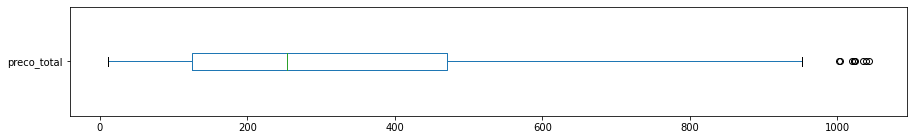

In [74]:
# Box plot com os outliers
df.preco_total.plot(kind='box', vert=False, figsize=(15,2))
plt.show()

In [75]:
print('{} entradas'.format(len(df[df.preco_total > 950])))
print('{:.2f}%'.format((len(df[df.preco_total > 950])/df.shape[0])*100))

11 entradas
1.10%


In [76]:
# removendo os valores acima de 950
df.drop(df[df.preco_total > 950].index, axis=0, inplace=True)

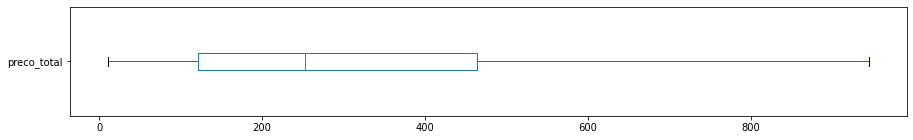

In [77]:
# Box plot sem os outliers
df.preco_total.plot(kind='box', vert=False, figsize=(15,2))
plt.show()

###Transformação de variaveis 

In [78]:
# mudando o tipo da variável data
df.data = pd.to_datetime(df.data, format='%m/%d/%Y')

In [79]:
# mudando o tipo da variável hora
df.hora = pd.to_datetime(df.hora, format='%H:%M')

In [80]:
# novos tipos das variáveis
df.dtypes

id                       object
mercado                  object
cliente                  object
genero                   object
linha_produto            object
preco_unid              float64
quantidade                int64
tax                     float64
preco_total             float64
data             datetime64[ns]
hora             datetime64[ns]
pagamento                object
cpv                     float64
renda_bruta             float64
avaliacao               float64
dtype: object

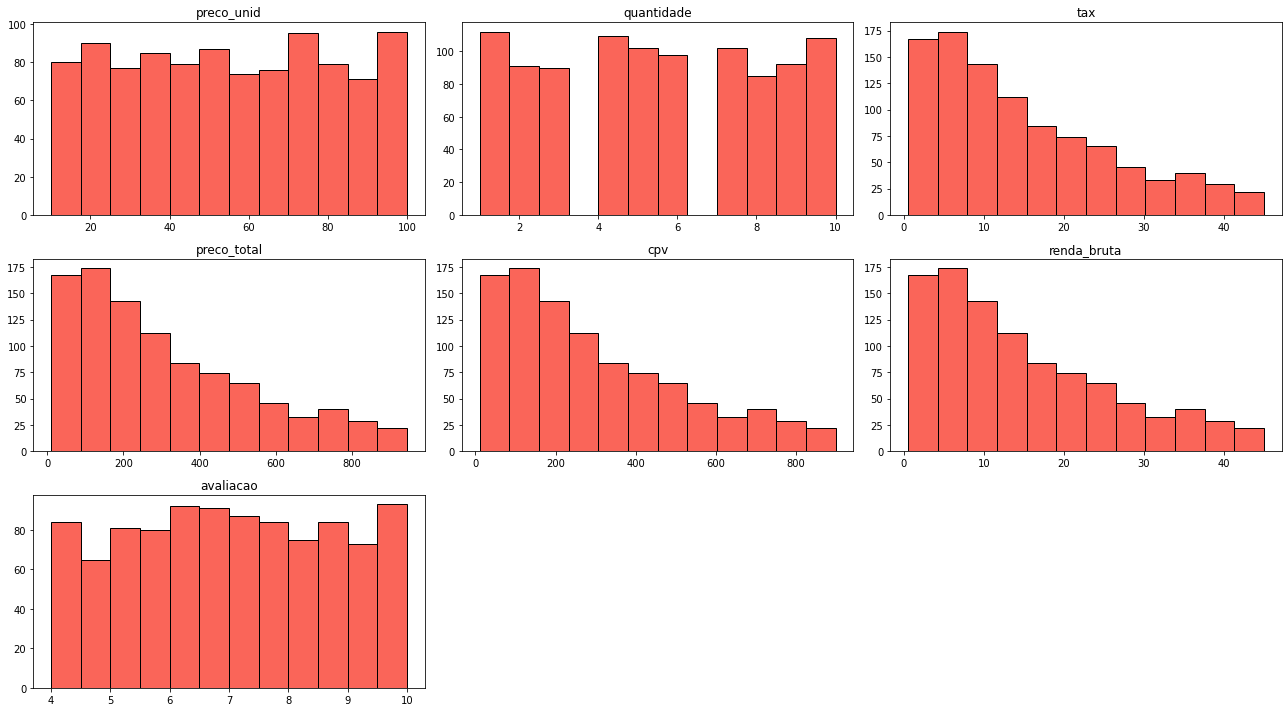

In [81]:
# histogramas 
df.hist(bins=12, figsize=(18,10), grid=False, ec = 'k', color = p)

plt.tight_layout()

### Valores nulos

Aqui irei verificar se há a presença de valores nulos no dataset

In [82]:
# valores vazios
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100

avaliacao        0.0
renda_bruta      0.0
cpv              0.0
pagamento        0.0
hora             0.0
data             0.0
preco_total      0.0
tax              0.0
quantidade       0.0
preco_unid       0.0
linha_produto    0.0
genero           0.0
cliente          0.0
mercado          0.0
id               0.0
dtype: float64

#Análise Exploratoria

Após o tratamento dos dados no dataset irei iniciar a análise explortória. Aqui irei mostrar as estatísticas detalhadas de alguns dados desse dataset, como por exemplo qual a maior receita entre os mercados, dentre outros... Vamos começar?

## Total, Média e Desvio padrão de vendas

Nessa etapa irei análisar os dados no geral e depois irei fazer a anáise por mercado.

In [83]:
# quantidade total, media e desvio padrao
print('Soma da receita dos mercados A, B e C: R${:.2f}'.format(df.preco_total.sum()))
print('Média da receita dos mercados A, B e C: R${:.2f}'.format(df.preco_total.mean()))
print('Desvio Padrão da receita dos mercados A, B e C: R${:.2f}'.format(df.preco_total.std()))

Soma da receita dos mercados A, B e C: R$311853.23
Média da receita dos mercados A, B e C: R$315.32
Desvio Padrão da receita dos mercados A, B e C: R$236.23


##Qual gênero mais compra?

In [84]:
#genero que mais compra
print(df['genero'].value_counts() / df.shape[0] * 100)
# ticket médio
df.groupby('genero').preco_total.mean().sort_values(ascending=False)[:]

Male      50.050556
Female    49.949444
Name: genero, dtype: float64


genero
Female    325.478320
Male      305.185745
Name: preco_total, dtype: float64

##Qual tipo de cliente mais compra?

In [85]:
#tipo de cliente
print(df['cliente'].value_counts() / df.shape[0] * 100)
df.groupby('cliente').preco_total.mean().sort_values(ascending=False)[:]

Member    50.151668
Normal    49.848332
Name: cliente, dtype: float64


cliente
Member    321.015230
Normal    309.593671
Name: preco_total, dtype: float64

## Quais as Linhas de Produtos mais vendidas?

In [86]:
df.linha_produto.value_counts()

Fashion accessories       175
Food and beverages        173
Electronic accessories    170
Sports and travel         165
Home and lifestyle        155
Health and beauty         151
Name: linha_produto, dtype: int64

### Geral

In [87]:
df.groupby('linha_produto').preco_total.sum().round(2).sort_values(ascending=False)

linha_produto
Food and beverages        55110.38
Electronic accessories    54337.53
Sports and travel         54120.71
Fashion accessories       51203.25
Home and lifestyle        48837.87
Health and beauty         48243.49
Name: preco_total, dtype: float64

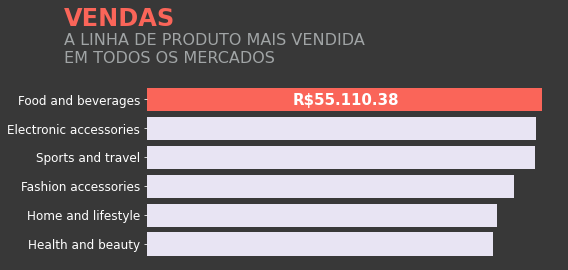

In [88]:
fig, ax = plt.subplots(figsize=(8, 4))

df.groupby('linha_produto').preco_total.sum().sort_values(ascending=False).plot(kind='barh', ax=ax, color = cor,width=0.8);

ax.text(-0.2, 1.3,'VENDAS', transform=ax.transAxes,fontsize=24, fontweight='bold',color=p)
ax.text(-0.2, 1.1,'A LINHA DE PRODUTO MAIS VENDIDA \nEM TODOS OS MERCADOS', transform=ax.transAxes,fontsize=16, color='#A1A5A6')

ax.invert_yaxis()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticklabels(labels=[], set_visible=False)
ax.set_xticks(ticks=[])
ax.set_ylabel('')
ax.tick_params(axis="y", labelsize=12, colors="w")
ax.set_facecolor('#383838')
fig.patch.set_facecolor('#383838')

ax.text(0.35, 0.87,'R$55.110.38', transform=ax.transAxes,fontweight='bold',fontsize=15, color='w')

plt.tight_layout()
plt.show()

### Individual

Por Receita

In [89]:
print('Mercado A','\n',df.loc[df.mercado == 'A'].linha_produto.value_counts(),'\n')
print('Mercado B','\n',df.loc[df.mercado == 'B'].linha_produto.value_counts(),'\n')
print('Mercado C','\n',df.loc[df.mercado == 'C'].linha_produto.value_counts())

df_A = df.loc[df.mercado == 'A']
df_B = df.loc[df.mercado == 'B']
df_C = df.loc[df.mercado == 'C']

Mercado A 
 Home and lifestyle        64
Electronic accessories    60
Sports and travel         59
Food and beverages        58
Fashion accessories       50
Health and beauty         47
Name: linha_produto, dtype: int64 

Mercado B 
 Fashion accessories       62
Sports and travel         62
Electronic accessories    55
Health and beauty         53
Food and beverages        50
Home and lifestyle        48
Name: linha_produto, dtype: int64 

Mercado C 
 Food and beverages        65
Fashion accessories       63
Electronic accessories    55
Health and beauty         51
Sports and travel         44
Home and lifestyle        43
Name: linha_produto, dtype: int64


In [90]:
print(df_A.groupby('linha_produto').preco_total.sum().round(2).sort_values(ascending=False), '\n')
print(df_B.groupby('linha_produto').preco_total.sum().round(2).sort_values(ascending=False), '\n')
print(df_C.groupby('linha_produto').preco_total.sum().round(2).sort_values(ascending=False))

linha_produto
Home and lifestyle        21465.37
Sports and travel         19372.70
Electronic accessories    18317.11
Food and beverages        17163.10
Fashion accessories       15293.22
Health and beauty         12597.75
Name: preco_total, dtype: float64 

linha_produto
Sports and travel         19988.20
Health and beauty         19980.66
Electronic accessories    17051.44
Fashion accessories       16413.32
Home and lifestyle        15504.29
Food and beverages        15214.89
Name: preco_total, dtype: float64 

linha_produto
Food and beverages        22732.39
Fashion accessories       19496.72
Electronic accessories    18968.97
Health and beauty         15665.08
Sports and travel         14759.81
Home and lifestyle        11868.21
Name: preco_total, dtype: float64


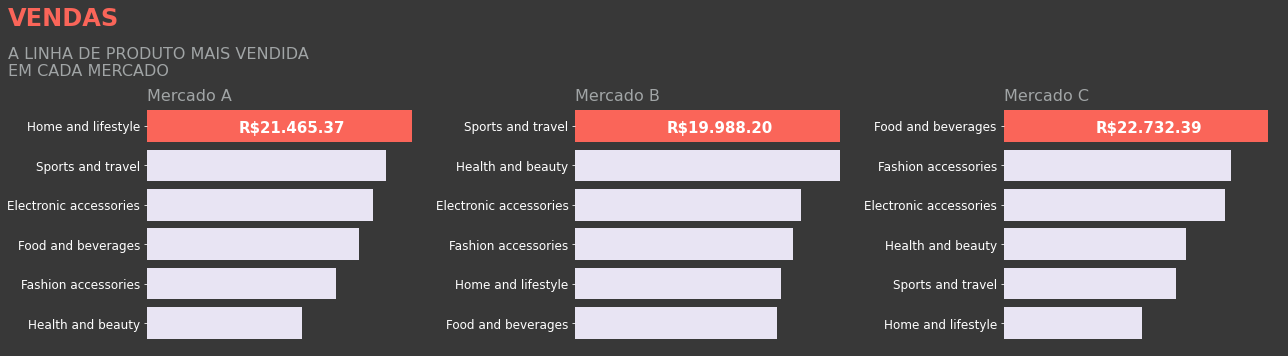

In [91]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize=(18, 5))

df_A.groupby('linha_produto').preco_total.sum().round(2).sort_values(ascending=False).plot(kind='barh', ax=ax1, color = cor,width=0.8);
df_B.groupby('linha_produto').preco_total.sum().round(2).sort_values(ascending=False).plot(kind='barh', ax=ax2, color = cor,width=0.8);
df_C.groupby('linha_produto').preco_total.sum().round(2).sort_values(ascending=False).plot(kind='barh', ax=ax3, color = cor,width=0.8);


ax1.text(-0.5, 1.3,'VENDAS', transform=ax1.transAxes,fontsize=24, fontweight='bold',color=p)
ax1.text(-0.5, 1.1,'A LINHA DE PRODUTO MAIS VENDIDA \nEM CADA MERCADO', transform=ax1.transAxes,fontsize=16, color='#A1A5A6')
ax1.text(0, 1,'Mercado A', transform=ax1.transAxes,fontsize=16, color='#A1A5A6')
ax2.text(0, 1,'Mercado B', transform=ax2.transAxes,fontsize=16, color='#A1A5A6')
ax3.text(0, 1,'Mercado C', transform=ax3.transAxes,fontsize=16, color='#A1A5A6')

ax1.text(0.33, 0.87,'R$21.465.37', transform=ax1.transAxes,fontweight='bold',fontsize=15, color='w')
ax2.text(0.33, 0.87,'R$19.988.20', transform=ax2.transAxes,fontweight='bold',fontsize=15, color='w')
ax3.text(0.33, 0.87,'R$22.732.39', transform=ax3.transAxes,fontweight='bold',fontsize=15, color='w')

for ax in (ax1, ax2, ax3):
  ax.invert_yaxis()
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.set_xticklabels(labels=[], set_visible=False)
  ax.set_xticks(ticks=[])
  ax.set_facecolor('#383838')
  fig.patch.set_facecolor('#383838')
  ax.tick_params(axis="y", labelsize=12, colors='w')
  ax.set_ylabel('')
  plt.tight_layout()

## Vendas Totais

In [92]:
df.groupby('mercado').preco_total.sum().round(2).sort_values(ascending=False)[:3]

mercado
A    104209.26
B    104152.80
C    103491.18
Name: preco_total, dtype: float64

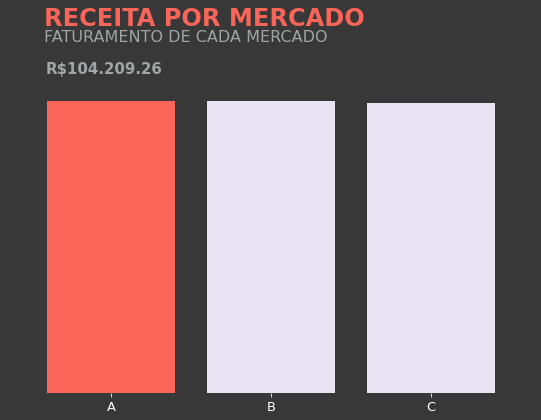

In [93]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=72)

df.groupby('mercado').preco_total.sum().round(2).sort_values(ascending=False)[:3].plot(kind='bar', ax=ax, color = cor,width=0.8);

ax.text(0.07, 1.2,'RECEITA POR MERCADO', transform=ax.transAxes,fontsize=24, fontweight='bold',color=p)
ax.text(0.07, 1.15,'FATURAMENTO DE CADA MERCADO', transform=ax.transAxes,fontsize=16, color='#A1A5A6')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="x", labelsize=13, colors='w')
ax.set_yticklabels([])
ax.set_yticks([])

ax.set_xlabel('') 
ax.text(-0.38, 1.35,'R$104.209.26', transform=ax1.transAxes,fontweight='bold',fontsize=15, color='#A1A5A6')


ax.set_facecolor('#383838')
fig.patch.set_facecolor('#383838')
plt.xticks(rotation='horizontal') 
plt.tight_layout()
plt.show()

## Avaliações dos Clientes

In [94]:
# quais mercados tem menos e mais classificação 
df.groupby('mercado').avaliacao.mean().round(2).sort_values(ascending=False)[:]

mercado
C    7.08
A    7.02
B    6.83
Name: avaliacao, dtype: float64

## Forma de pagamento mais usada

In [95]:
# qual tipo de pagamento menos e mais usado 
df.pagamento.value_counts() / df.shape[0] * 100

Cash           34.479272
Ewallet        34.479272
Credit card    31.041456
Name: pagamento, dtype: float64

## Qual dia da semana mais vende?

Seg = 0, Ter = 1, ... 

In [96]:
df['data'].apply(lambda x: x.weekday()). value_counts()

5    162
1    157
2    140
3    138
4    134
6    133
0    125
Name: data, dtype: int64

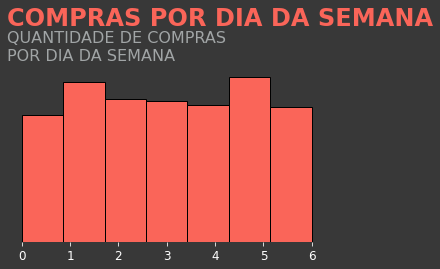

In [101]:
fig, ax = plt.subplots()
df['data'].apply(lambda x: x.weekday()).hist(bins=7, ax=ax, grid=False, ec = 'k', color = p);

ax.text(0, 1.25,'COMPRAS POR DIA DA SEMANA', transform=ax.transAxes,fontsize=24, fontweight='bold',color=p)
ax.text(0, 1.05,'QUANTIDADE DE COMPRAS \nPOR DIA DA SEMANA', transform=ax.transAxes,fontsize=16, color='#A1A5A6')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_yticklabels(labels=[], set_visible=False)
ax.set_yticks(ticks=[])
ax.set_facecolor('#383838')
fig.patch.set_facecolor('#383838')
ax.tick_params(axis="x", labelsize=12, colors='w')

plt.tight_layout()
plt.show()

## Qual hora do dia mais vende?

In [98]:
#horas com mais compras
df['hora'] = df['hora'].dt.hour
df.hora.value_counts()

19    113
15    102
10    100
13     98
18     93
11     90
12     89
14     82
16     75
20     74
17     73
Name: hora, dtype: int64

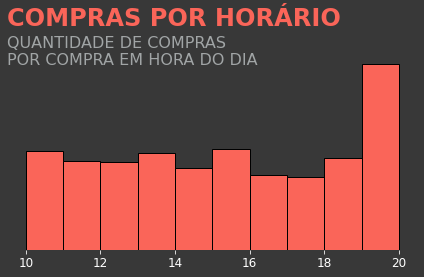

In [99]:
fig, ax = plt.subplots()
df['hora'].hist(ax=ax, grid=False, ec = 'k', color = p);

ax.text(0, 1.15,'COMPRAS POR HORÁRIO', transform=ax.transAxes,fontsize=24, fontweight='bold',color=p)
ax.text(0, 0.95,'QUANTIDADE DE COMPRAS \nPOR COMPRA EM HORA DO DIA', transform=ax.transAxes,fontsize=16, color='#A1A5A6')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_yticklabels(labels=[], set_visible=False)
ax.set_yticks(ticks=[])
ax.set_facecolor('#383838')
fig.patch.set_facecolor('#383838')
ax.tick_params(axis="x", labelsize=12, colors='w')

plt.tight_layout()

# Conclusões

Após analisar esse dataset, é possível chegar à algumas conclusões, sendo essas:
* O Ticket médio dos Membros é maior que o dos CLientes;
* Sábado é o dia em que mais ocorrem vendas;
* A Linha de Produtos de Alimentos e Bebidas é a máis rentável no geral;
* O supermercado A é o mais rentável dos 3;

Dentre outras conclusões. Vale ressaltar que esse projeto foi feito para fins de estudo sobre o assunto. Logo, em caso de trabalhos sérios para empresas reais este seria feito de forma mais aprofundada, focado em apresentar mais insights que ajudassem na tomada de decisão da empresa. 

Desde já, agradeço por ter lido.
